In [113]:
!pip3 install nb_black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  error in nb_black setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after name and no valid version specifier)
      yapf >= '0.28'; python_version < '3.6'
           ^
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [117]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as web

In [118]:
START_DATE='2017-01-01'
END_DATE = '2023-11-01'
df = web.get_data_yahoo("SPY", start=START_DATE, end=END_DATE)

# this code is not working so we downloaded data through another code

TypeError: string indices must be integers, not 'str'

In [4]:
import yfinance as yf
# we used yfinance lib to do our work 
# download dataframe
data = yf.download("SPY", start="2017-01-01", end="2023-11-01")

[*********************100%%**********************]  1 of 1 completed


In [17]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629669,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823334,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662933,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384445,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716400,46939700


In [7]:
type(data)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

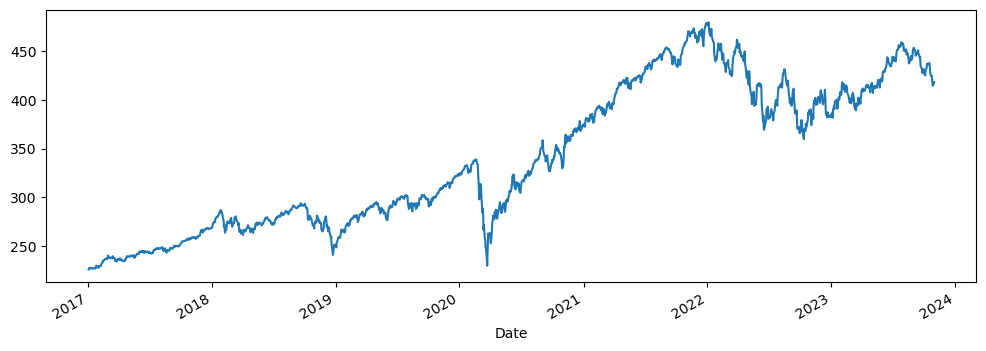

In [8]:
data['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

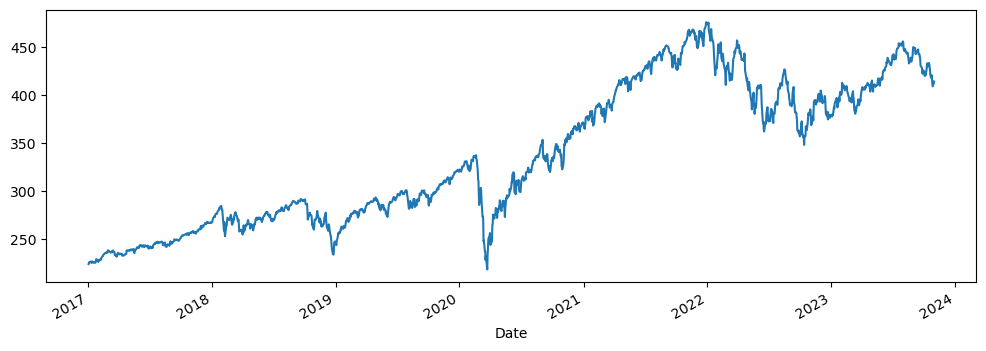

In [9]:
data['Low'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

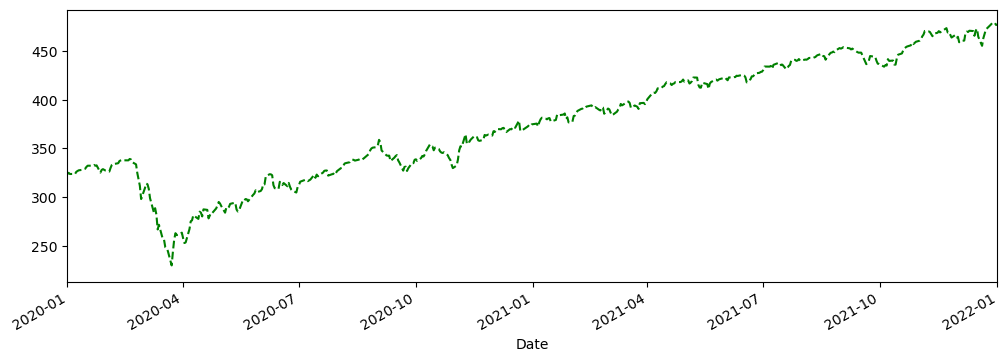

In [10]:
# lets specify xlimit and ylimit
data['High'].plot(xlim=['2020','2022'],figsize=(12,4),c='green',ls='--')

In [11]:
data.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='Date', length=1719, freq=None)

In [31]:
index = data.loc['2019-03-01':'2021-03-01'].index
s_open = data.loc['2019-03-01':'2021-03-01']['Open']
# in loc we don't consider starting value but we include ending value

In [32]:
import matplotlib.pyplot as plt

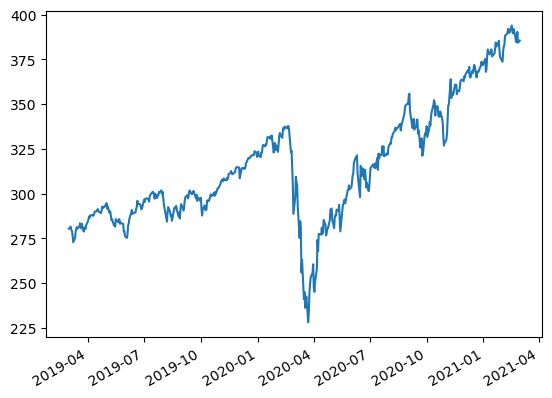

In [35]:
figure ,axis = plt.subplots()
figure.autofmt_xdate()  #this unction adusts alignement of variables  in the axis
axis.plot(index,s_open)

In [44]:
##working with datetime 
data = data.reset_index()
# now we can use date column as dataframe got out from being index now we can convert it into datetime 

In [63]:
pd.to_datetime(data['Date'])
# now we use date as index after converting it into datatime format
data = data.set_index('Date',drop=True)

In [64]:
# to get current date what we do is,we can use this to measure the time
# learning more about date
date = datetime.now()
print(date.day)
print(date.year)
print(date.month)
print(date.weekday()) #weekday is a function

18
2023
11
5


# Time Resamlping

<Axes: xlabel='Date'>

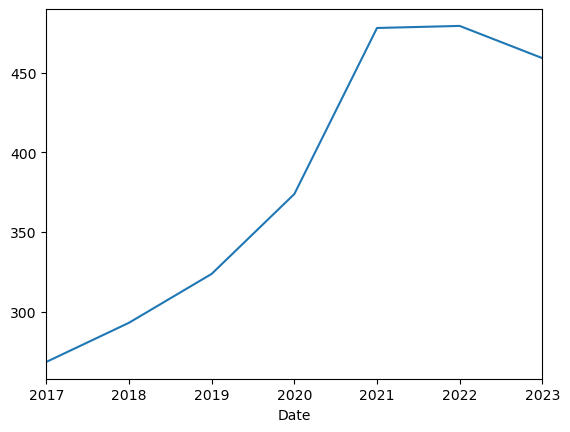

In [79]:
# important concept in time series to know
# data.resample(rule='A').max() gives that years max value for every column
#year end frequency - A
data['Open'].resample(rule='A').max().plot()
# plotting same time rsampling data

<Axes: xlabel='Date'>

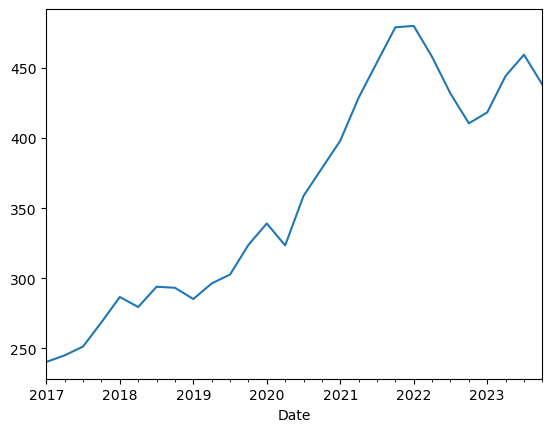

In [83]:
# Quaterly start frequency 
# QS- gives quater strt freq for that years
data.resample(rule='QS').max()['High'].plot()

<Axes: ylabel='Density'>

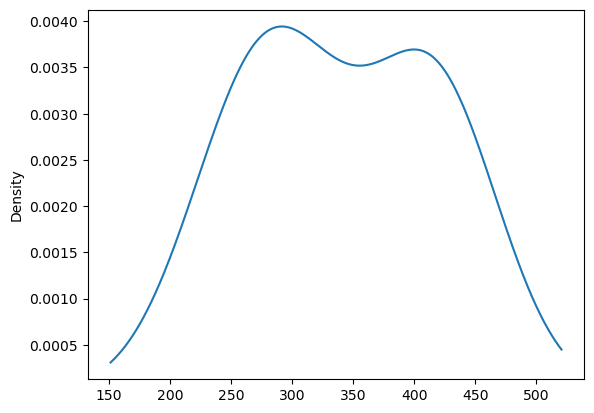

In [101]:
# Business end frequency -BA , business quaterly start - BQS
data['Open'].resample(rule='BA').median().plot(kind='kde')
# line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot (DataFrame only)
# ‘hexbin’ : hexbin plot (DataFrame only)

<Axes: xlabel='Date'>

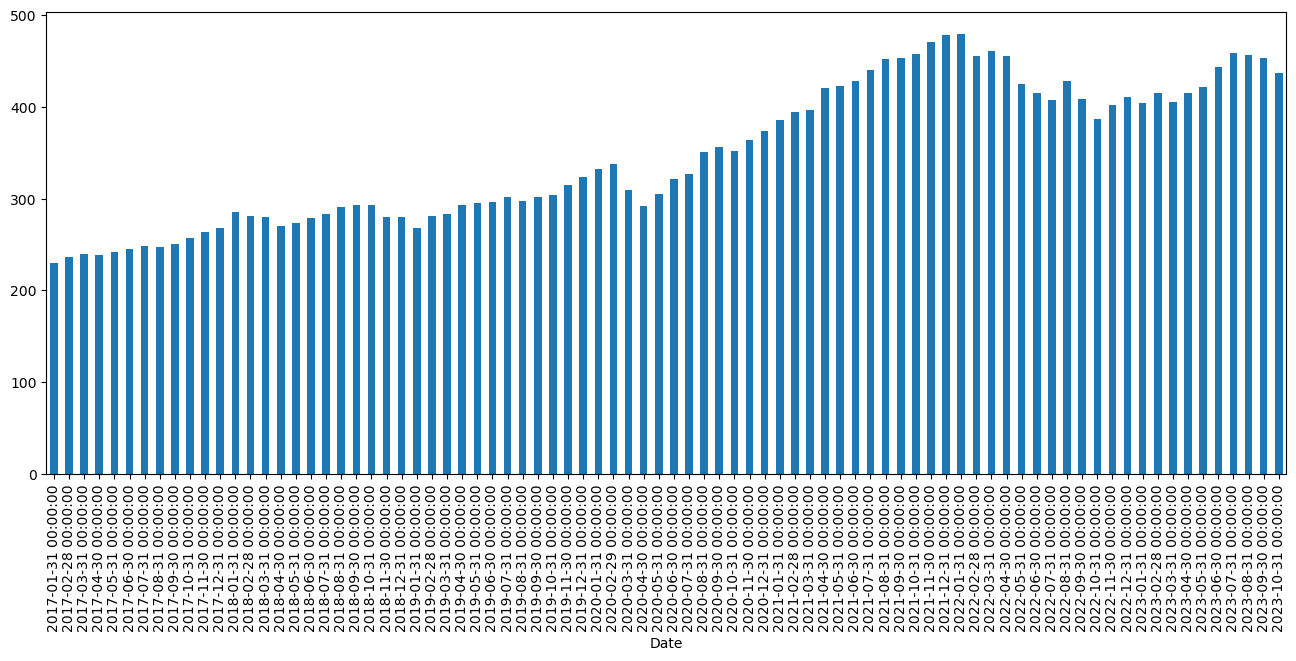

In [119]:
# month end freq - M

figure.autofmt_xdate()
data['Open'].resample(rule='M').max().plot(kind='bar',figsize=(16,6))

<Axes: xlabel='Date'>

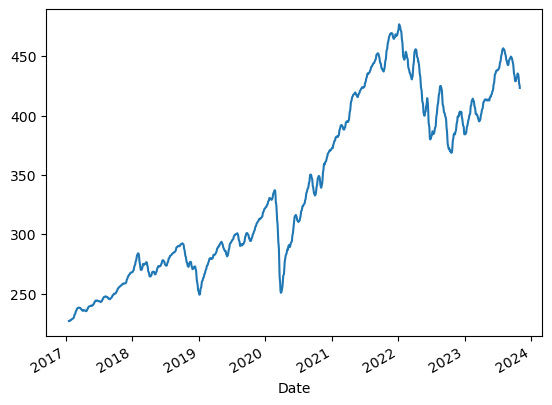

In [125]:
# rolling on time series data
# rolling is rolling through specified number of days and calculating specified aggregate function
# we need to specify aggregate function when we use functions like resampling and rolling
data['High'].rolling(10).mean().plot()

In [126]:
data['High:30 days rolling'] = data['High'].rolling(30).mean()

In [127]:
data

,Open,High,Low,Close,Adj Close,Volume,High:30 days rolling
Date,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629669,91366500,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823334,78744400,NaN
2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662933,78379000,NaN
2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384445,71559900,NaN
2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716400,46939700,NaN
...,...,...,...,...,...,...,...
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200,433.752337
2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800,432.627337
2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107367700,431.531336


<Axes: xlabel='Date'>

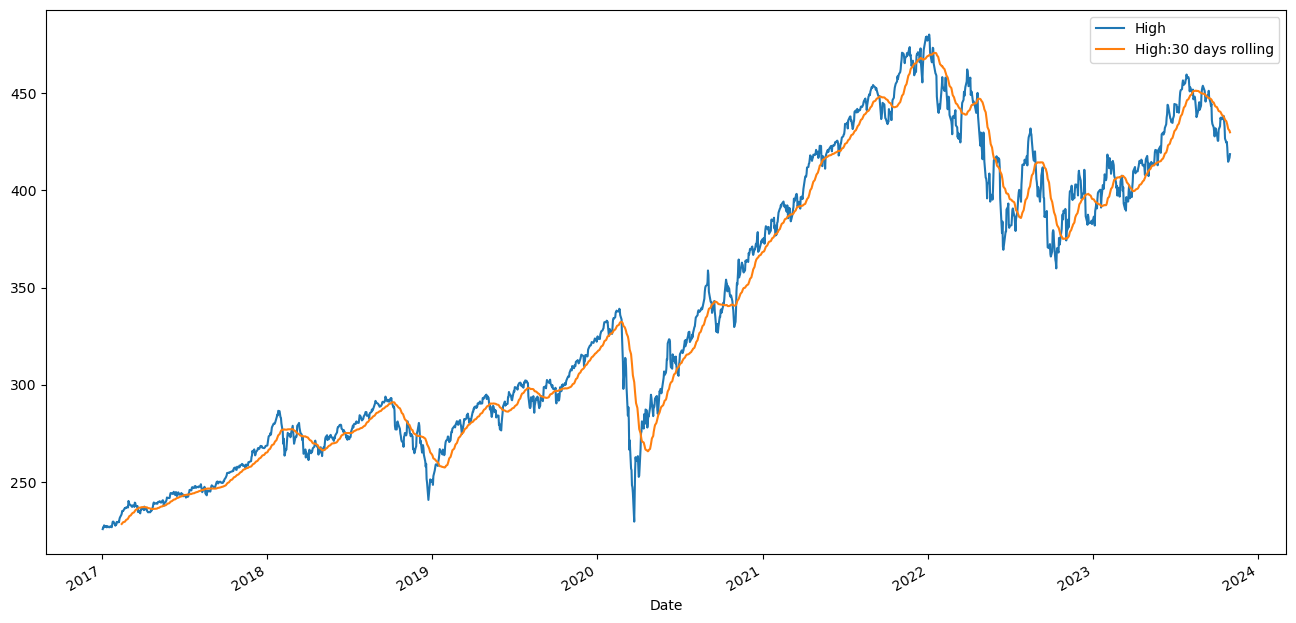

In [134]:
plt
data[['High','High:30 days rolling']].plot(figsize=(16,8))

In [151]:
# finding maxium price of share from 2017 to 2019
high = max(data.loc['2017':'2019']['High'].resample('A').max())

In [189]:
# get highest priced date
date_high = max(data['High'])
date = data[data['High'] == date_high].index.values
# print(date)
# or using resample 
# 14T used to calculate time sum after 14 minutes
h_date = max(data.resample(rule='D')['High'].max())
print(data[data['High'] == h_date].index.values)

['2022-01-04T00:00:00.000000000']


In [199]:
# get lowest priced date
l_date = min(data.resample(rule='D')['Low'].min())
print(data[data['Low'] == l_date].index.values)

['2020-03-23T00:00:00.000000000']
